In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [42]:
train_data = pd.read_csv(r'MoonDataTrain.csv')
test_data = pd.read_csv(r'MoonDataTest.csv')
train_data.head()

,x1,x2,y
0,0.548617,-0.351505,1
1,1.465024,-0.155913,1
2,0.887746,0.397648,0
3,-0.617127,0.926962,0
4,-0.058103,1.180591,0


## 决策边界

In [20]:
def plot_decision_bundary(pred_func):
    # 设定最大值 最小值 附加边缘填充
    x_min, x_max = train_data.x1.min() - 0.5, train_data.x1.max() - 0.5
    y_min, y_max = train_data.x2.min() - 0.5, train_data.x2.max() - 0.5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    # 用预测函数预测
    Z = pred_func(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 画图
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.scatter(test_data.x1,test_data.x2,c=test_data.y,cmap=plt.cm.Spectral)

## 预测函数

In [25]:
def predict(model,x):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    # 向前运算
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    # 计算概率输出最大概率对应的类别
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
    return np.argmax(probs,axis=1)

## 损失函数定义

In [26]:
def calculate_loss(model,X,y):
    num_xamples = len(X)
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    # 向前推进 前向运算
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
    # 计算损失
    corect_logprobs = -np.log(probs[range(num_xamples),y])
    data_loss = np.sum(corect_logprobs)
    # 加上正则化项
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_xamples * data_loss

## 构建训练函数

In [31]:
def build_model(nn_hdim,numpasses=20000,print_loss=False):
    '''
    nn_hdim: 隐藏节点个数
    num_passes: 梯度下降迭代次数
    print_loss:  是否打印loss的值
    '''
    
    # 随机初始化权重
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim,nn_hdim) / np.square(nn_input_dim)
    b1 = np.zeros((1,nn_hdim))
    W2 = np.random.randn(nn_hdim,nn_output_dim) /np.square(nn_hdim)
    b2 = np.zeros((1,nn_output_dim))
    
    # 模型
    model={}
    X = np.array(train_data.iloc[:,:2])
    y = train_data.y
    num_examples = len(X)
    # 开始梯度下降
    for i in range(0,numpasses):
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
        
        # 反向传播
        delta3 = probs
        delta3[range(num_examples),y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3,axis=0,keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1,2))
        dW1 = np.dot(X.T,delta2)
        db1 = np.sum(delta2,axis=0)
        
        # 加上正则化项
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # 梯度下降更新参数
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # 得到的模型实际上就是这些权重
        model = {'W1': W1,'b1':b1,'W2':W2,'b2':b2}
        
        # 打印loss
        if print_loss and i%1000==0:
            print("Train Loss after iteration %i %f"%(i,calculate_loss(model,np.array(train_data.iloc[:,:2]),train_data.y)))
        if print_loss and i%5000==0:
            print("--- Test Loss after iteration %i %f"%(i,calculate_loss(model,np.array(test_data.iloc[:,:2]),test_data.y)))
    print("-------> TRAIN STOP AT FINAL LOSS %f"%(calculate_loss(model,np.array(test_data.iloc[:,:2]),test_data.y)))
    return model

## 开始训练

Train Loss after iteration 0 0.616612
--- Test Loss after iteration 0 0.620036
Train Loss after iteration 1000 0.074351
Train Loss after iteration 2000 0.073538
Train Loss after iteration 3000 0.073357
Train Loss after iteration 4000 0.073740
Train Loss after iteration 5000 0.073321
--- Test Loss after iteration 5000 0.108738
Train Loss after iteration 6000 0.073834
Train Loss after iteration 7000 0.073349
Train Loss after iteration 8000 0.074403
Train Loss after iteration 9000 0.073368
Train Loss after iteration 10000 0.073808
--- Test Loss after iteration 10000 0.109573
Train Loss after iteration 11000 0.073388
Train Loss after iteration 12000 0.073242
Train Loss after iteration 13000 0.073396
Train Loss after iteration 14000 0.073255
Train Loss after iteration 15000 0.073486
--- Test Loss after iteration 15000 0.109889
Train Loss after iteration 16000 0.073285
Train Loss after iteration 17000 0.073542
Train Loss after iteration 18000 0.073286
Train Loss after iteration 19000 0.07360

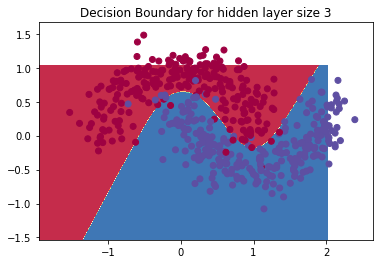

In [35]:
# 输入的维度
nn_input_dim = 2
# 输出的维度
nn_output_dim = 2

# 梯度下降参数
# 学习率
epsilon = 0.001
# 正则化参数
reg_lambda = 0.0001

# 建立隐层有3个节点的神经网络
model = build_model(3,print_loss=True)

# 画出决策/判定边界
plot_decision_bundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

In [38]:
W= np.random.randn(2,3) / np.square(2)
W

array([[ 0.56743866, -0.36359142,  0.01143963],
       [-0.04679596,  0.3831948 ,  0.36733969]])

In [39]:
 np.random.randn(2,3)

array([[ 0.15494743,  0.37816252, -0.88778575],
       [-1.98079647, -0.34791215,  0.15634897]])